In [1]:
import os
import sys
from osgeo import ogr
os.environ['QT_QPA_PLATFORM'] = 'offscreen'
sys.path.insert(0,'C:/Program Files/QGIS 3.10/apps/qgis/python')
from qgis.core import *
QgsApplication.setPrefixPath("C:/Program Files/QGIS 3.10/apps/qgis/lib", True) 
#from qgis.server import *
from qgis.gui import *
from qgis import processing

from qgis.PyQt.QtGui import QColor, QImage, QFont
from qgis.PyQt.QtCore import QSize, QBuffer, QIODevice

qgs = QgsApplication([], False)
qgs.initQgis()
print(QgsApplication.showSettings())

Application state:
QGIS_PREFIX_PATH env var:		C:/PROGRA~1/QGIS3~1.10/apps/qgis
Prefix:		C:/PROGRA~1/QGIS3~1.10/apps/qgis
Plugin Path:		C:/PROGRA~1/QGIS3~1.10/apps/qgis/plugins
Package Data Path:	C:/PROGRA~1/QGIS3~1.10/apps/qgis/.
Active Theme Name:	
Active Theme Path:	C:/PROGRA~1/QGIS3~1.10/apps/qgis/./resources/themes\\icons/
Default Theme Path:	:/images/themes/default/
SVG Search Paths:	C:/Program Files/QGIS 3.10/apps/qgis/lib/./svg/
		C:/PROGRA~1/QGIS3~1.10/apps/qgis/./svg/
		C:/Users/migue/AppData/Roaming/python3\profiles\default/svg/
User DB Path:	C:/PROGRA~1/QGIS3~1.10/apps/qgis/./resources/qgis.db
Auth DB Path:	C:/Users/migue/AppData/Roaming/python3\profiles\default/qgis-auth.db



In [2]:
covid_gpkg = "./Data/Geopackage.gpkg"
conn = ogr.Open(covid_gpkg)
for i in conn:
    vlayer = QgsVectorLayer("{}|layername={}".format(covid_gpkg, i.GetName()), i.GetName(), "ogr")
    if not vlayer.isValid():
        print("Layer {} failed to load".format(i.GetName()))
    else:
        QgsProject.instance().addMapLayer(vlayer)
        print("Layer {} loaded".format(i.GetName()))

Layer Camada unida loaded
Layer Centroides loaded
Layer layer_styles loaded


Gerar mapa com 350 por 717


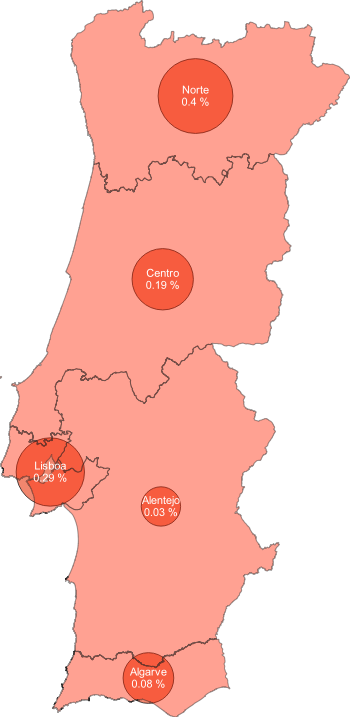

In [3]:
from IPython.display import Image
vlayer2 = QgsProject.instance().mapLayersByName('Camada unida')[0]
vlayer = QgsProject.instance().mapLayersByName('Centroides')[0]
xt = vlayer2.extent()

width  = 350
height = int(width*xt.height()/xt.width())
print("Gerar mapa com {} por {}".format(width, height))
options = QgsMapSettings()
options.setLayers([vlayer2,vlayer])
options.setBackgroundColor(QColor(255, 255, 255))

options.setOutputSize(QSize(width, height))
options.setExtent(xt)
           
render = QgsMapRendererParallelJob(options)
render.start()
render.waitForFinished()

image = render.renderedImage()
imgbuf= QBuffer()
imgbuf.open( QIODevice.ReadWrite )
image.save('figuras/Portugal.png',"PNG")
image.save( imgbuf,"PNG" )
Image( imgbuf.data() )